In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/recipe_dataset.csv')
data = data.head(10000)
data = data.drop(data.columns[0], axis=1)
data

,recipe_id,recipe_name,url,recipe_Ingredients,Instructions,cuisine,Prep Time in Minutes
0,1,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"2 cups chicken broth, 1 (14.5 ounce) can diced...","Place chicken broth, tomatoes, flour, chili po...",['Mexican Inspired'],480
1,2,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"2.6666667461395 cups all-purpose flour, 1.5 te...",Preheat the oven to 350 degrees F (175 degrees...,['American'],60
2,3,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"1 pound flounder fillets, 0.5 teaspoon salt, g...",Gather all ingredients. Preheat the oven to 40...,['American'],25
3,4,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o...",Preheat the oven to 450 degrees F (230 degrees...,['American'],20
4,5,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333...","Beat egg with a fork in a small, heavy saucepa...",['German'],10
...,...,...,...,...,...,...,...
9995,9996,Earthquake Cookies,https://www.allrecipes.com/recipe/10904/earthq...,"1 (18.25 ounce) package devil's food cake mix,...","Mix cake mix, eggs, shortening, and water in a...",['American'],10
9996,9997,Pistachio-Crusted Salmon,https://www.allrecipes.com/recipe/269394/pista...,"0.25 cup crushed pistachios, 2 tablespoons pan...",Preheat the oven to 375 degrees F (190 degrees...,['American'],15
9997,9998,Classic Shepherd&#39;s Pie,https://www.allrecipes.com/recipe/217812/class...,"1 tablespoon vegetable oil, 1 onion, chopped, ...",Preheat the oven to 350 degrees F (180 degrees...,['Uk And Ireland'],35
9998,9999,One-Pot Spaghetti with Meat Sauce,https://www.allrecipes.com/recipe/269004/one-p...,"1 pound ground Italian sausage, 1 small white ...","Combine ground sausage, onions, and garlic in ...",['Italian'],30


In [3]:
ingredients = []
with open('dataset/recipe_ingredient_pairs.txt', 'r', encoding='utf-8') as file:
    for line in file:
        recipe_id, ingredient = line.strip().split(' - ', 1)
        ingredients.append({'recipe_id': int(recipe_id), 'ingredient': ingredient})
pair_ingredients_df = pd.DataFrame(ingredients)
pair_ingredients_df

,recipe_id,ingredient
0,1,tomatoes
1,1,purpose flour
2,1,clove garlic
3,1,cayenne pepper
4,1,skinless
...,...,...
93390,12184,miniature marshmallows
93391,12184,milk
93392,12184,dash salt
93393,12184,chips


In [4]:
ingredient_counts =pair_ingredients_df['ingredient'].value_counts()
df_ingredient_counts = ingredient_counts.reset_index()
df_ingredient_counts.columns = ['Ingredient', 'Count']
df_ingredient_counts


,Ingredient,Count
0,black pepper,4084
1,purpose flour,3016
2,salt,2310
3,brown sugar,1531
4,eggs,1421
...,...,...
7403,crunchy cheese puffs,1
7404,snack mix,1
7405,graham cracker rectangles,1
7406,square pieces,1


In [5]:
df_ingredient_counts['Ingredient'].duplicated().any()

False

In [6]:
total_count = df_ingredient_counts['Count'].sum()
total_count

93395

In [7]:
df_ingredient_counts['Proportion'] = df_ingredient_counts['Count'] / total_count
df_ingredient_counts

,Ingredient,Count,Proportion
0,black pepper,4084,0.043728
1,purpose flour,3016,0.032293
2,salt,2310,0.024734
3,brown sugar,1531,0.016393
4,eggs,1421,0.015215
...,...,...,...
7403,crunchy cheese puffs,1,0.000011
7404,snack mix,1,0.000011
7405,graham cracker rectangles,1,0.000011
7406,square pieces,1,0.000011


In [8]:
cuisine_initial = data
df_cuisine_ini = cuisine_initial[['recipe_name','recipe_Ingredients']]
df_cuisine_ini

,recipe_name,recipe_Ingredients
0,Super Easy Slow Cooker Chicken Enchilada Meat,"2 cups chicken broth, 1 (14.5 ounce) can diced..."
1,Avocado Quick Bread,"2.6666667461395 cups all-purpose flour, 1.5 te..."
2,Quick and Easy Baked Fish Fillet,"1 pound flounder fillets, 0.5 teaspoon salt, g..."
3,Roasted Kohlrabi,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o..."
4,Custard Buttercream,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333..."
...,...,...
9995,Earthquake Cookies,"1 (18.25 ounce) package devil's food cake mix,..."
9996,Pistachio-Crusted Salmon,"0.25 cup crushed pistachios, 2 tablespoons pan..."
9997,Classic Shepherd&#39;s Pie,"1 tablespoon vegetable oil, 1 onion, chopped, ..."
9998,One-Pot Spaghetti with Meat Sauce,"1 pound ground Italian sausage, 1 small white ..."


In [9]:
grouped_ingredients = pair_ingredients_df.groupby('recipe_id')['ingredient'].apply(list).reset_index(name='ingredients')
grouped_ingredients = grouped_ingredients.head(10000)
grouped_ingredients

,recipe_id,ingredients
0,1,"[tomatoes, purpose flour, clove garlic, cayenn..."
1,2,"[purpose flour, soda, powder, eggs, ripe avoca..."
2,3,"[black pepper, butter, onion]"
3,4,"[kohlrabi bulbs, clove garlic, salt, pepper, P..."
4,5,"[egg, unsalted butter, room temperature]"
...,...,...
9995,10029,"[red potatoes, large skinless, boneless chicke..."
9996,10030,"[bunch, green onions, white parts, green parts..."
9997,10031,"[white rice, Minute ®, brown sugar]"
9998,10032,"[spray, flour, butter, brown sugar, rings, jar..."


The code for creating 10 sets of random cuisines.

In [10]:
import numpy as np
import pandas as pd
from collections import Counter

prob = df_ingredient_counts['Proportion'].tolist()
ingredients = df_ingredient_counts['Ingredient'].tolist()
# print(probabilities)

size_ingre_freq_controlled_df = []

for j in range(10):
    print("Creating size controlled frequency controlled recipes for cuisine", j + 1)
    d = {}
    d['recipe_id'] = []
    d['ingredients'] = []
    for i in range(len(df_cuisine_ini)):
        n = len(grouped_ingredients['ingredients'][i])
        sampled_ingr = np.random.choice(ingredients, size=n, p=prob, replace=False).tolist()
        d['recipe_id'].append(f"R{i + 1}")
        d['ingredients'].append(sampled_ingr)
    size_controlled_recipes_df = pd.DataFrame(d)
    size_ingre_freq_controlled_df.append(size_controlled_recipes_df)



Creating size controlled frequency controlled recipes for cuisine 1
Creating size controlled frequency controlled recipes for cuisine 2
Creating size controlled frequency controlled recipes for cuisine 3
Creating size controlled frequency controlled recipes for cuisine 4
Creating size controlled frequency controlled recipes for cuisine 5
Creating size controlled frequency controlled recipes for cuisine 6
Creating size controlled frequency controlled recipes for cuisine 7
Creating size controlled frequency controlled recipes for cuisine 8
Creating size controlled frequency controlled recipes for cuisine 9
Creating size controlled frequency controlled recipes for cuisine 10


# Q3a

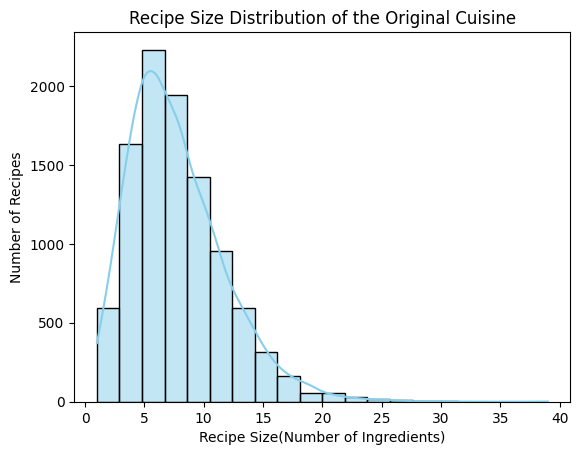

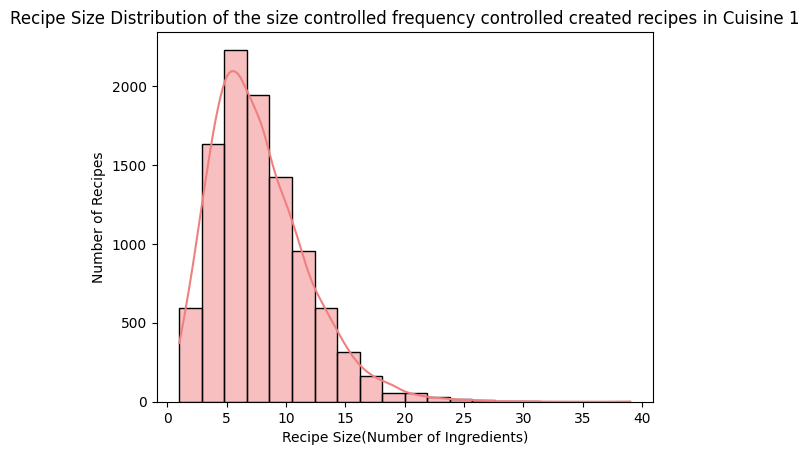

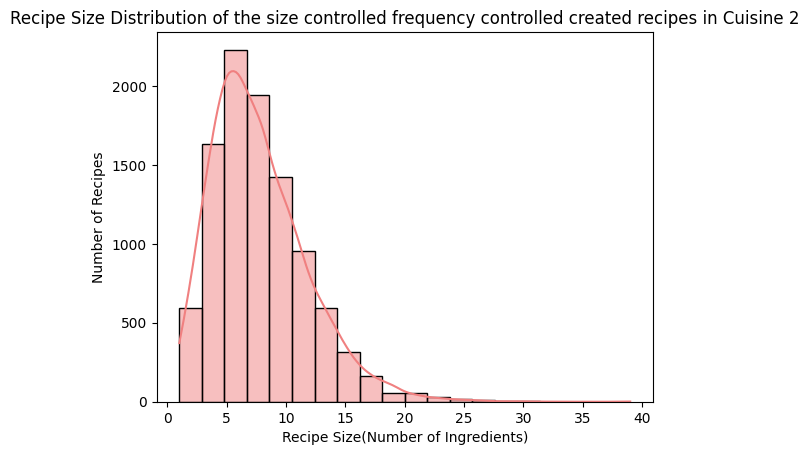

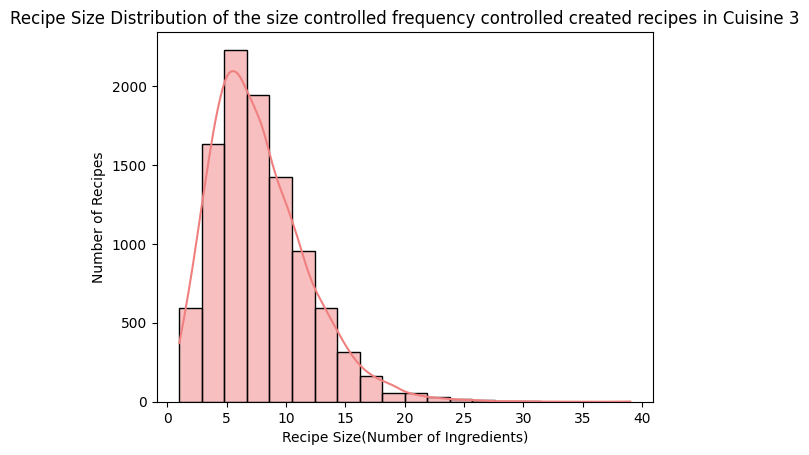

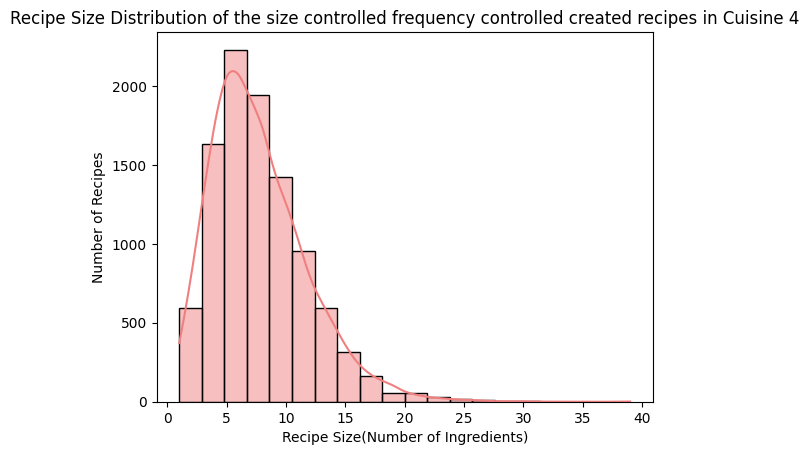

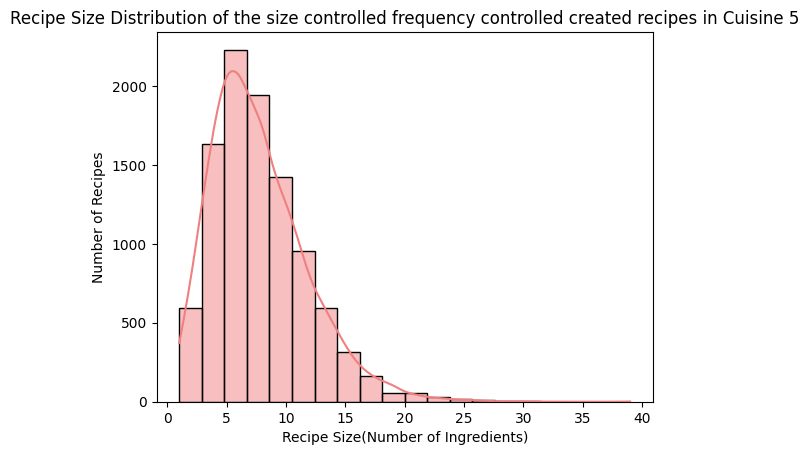

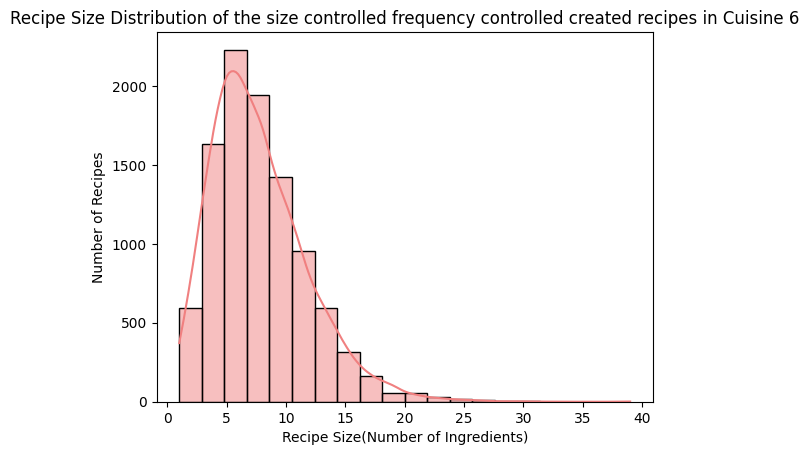

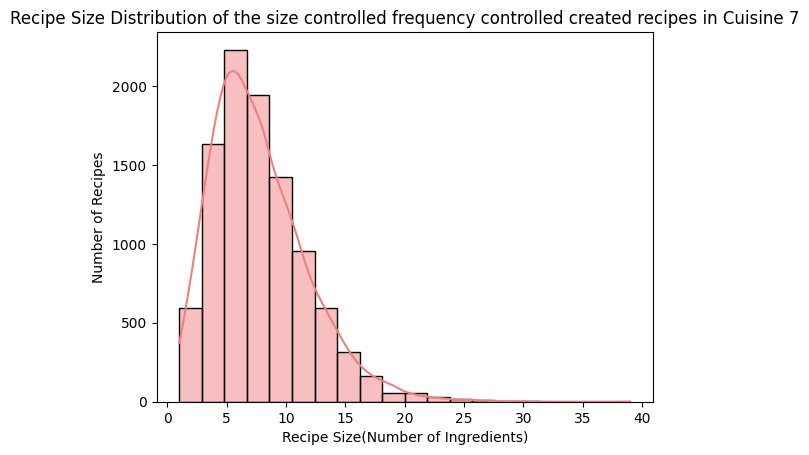

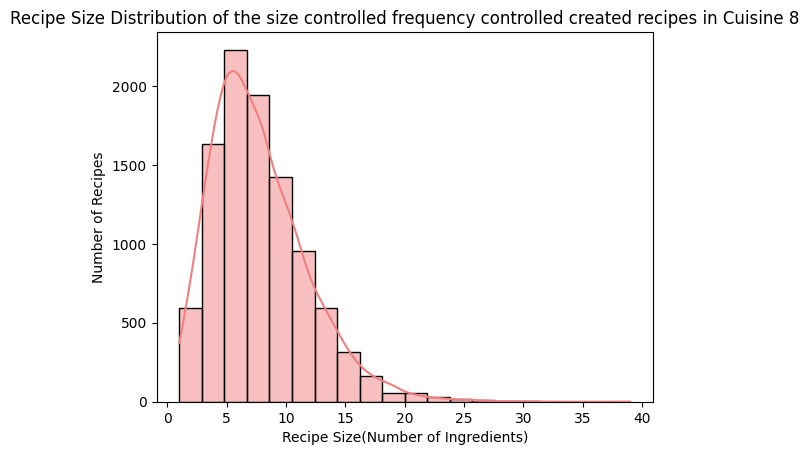

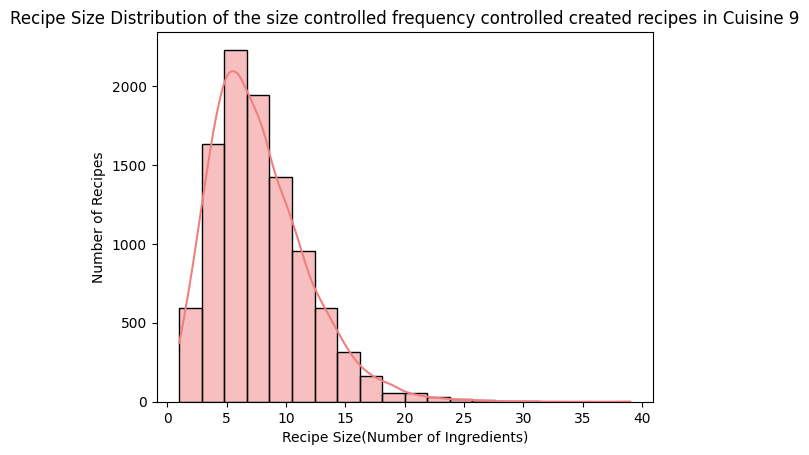

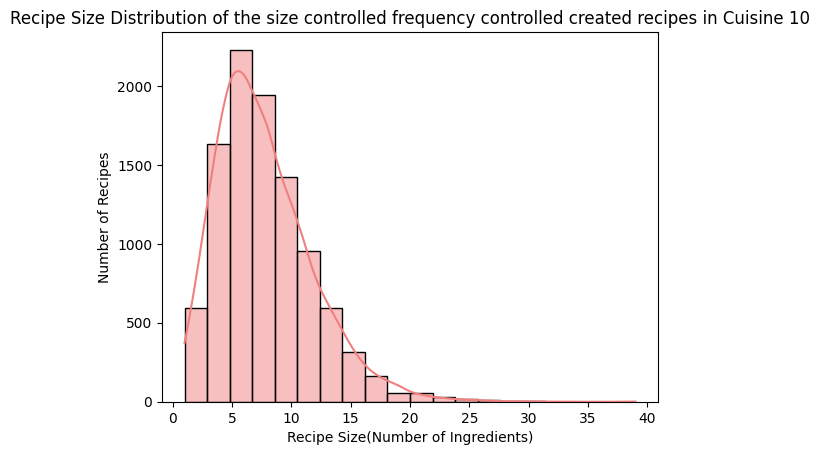

In [11]:
import matplotlib.pyplot as plt

plt.title('Recipe Size Distribution of the Original Cuisine')
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(grouped_ingredients['ingredients'][i]))
                       
plt.xlabel('Recipe Size(Number of Ingredients)')
plt.ylabel('Number of Recipes')
sns.histplot(recipe_size, bins=20, color='skyblue', kde=True)
plt.savefig('Q3_plots/Q3a_original_cuisine_recipe_size_distribution.png')
plt.show()

for i in range(0, 10):
    recipe_size = []
    for j in range(0, len(size_ingre_freq_controlled_df[i])):
        recipe_size.append(len(size_ingre_freq_controlled_df[i]['ingredients'][j]))
    plt.title('Recipe Size Distribution of the size controlled frequency controlled created recipes in Cuisine '+str(i+1))
    plt.xlabel('Recipe Size(Number of Ingredients)')
    plt.ylabel('Number of Recipes')
    sns.histplot(recipe_size, bins=20, color='lightcoral', kde=True)
    plt.savefig('Q3_plots/Q3a_size_controlled_frequency_controlled_created_recipes_cuisine_'+str(i+1)+'.png')
    plt.show()


# Q3b

Code for the frequency-rank distribution plot of the original cuisine and random recipes.

In [12]:
#function that takes a df that has recipe_id and its corresponding ingredients and returns a df with ingredient and its count
def get_count_df(df):
    all_ingredients = [ingredient for ingredients_list in df['ingredients'] for ingredient in ingredients_list]
    ingredient_counts = Counter(all_ingredients)
    df_ingredient_counts = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count'])
    df_ingredient_counts = df_ingredient_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

    return df_ingredient_counts

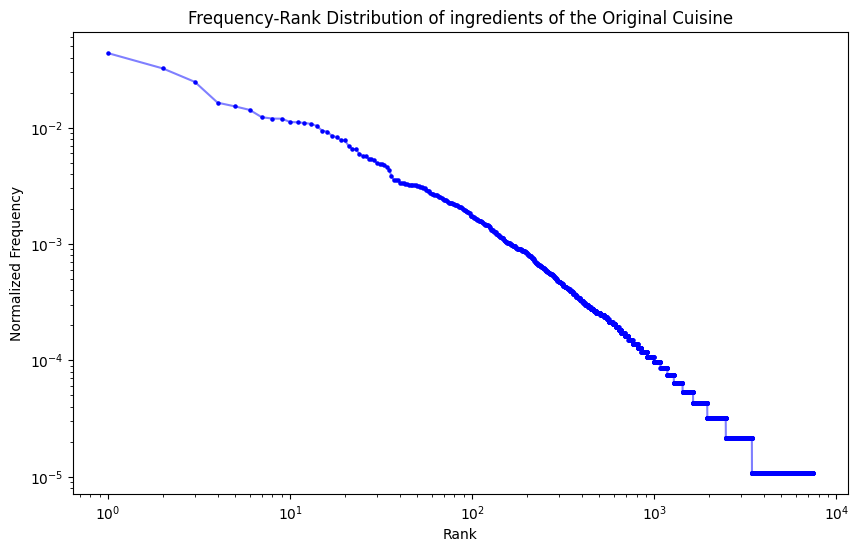

In [13]:

# we append the rank and frequency of each ingredient in the df that already has the count of each ingredient

df_ingredient_counts = df_ingredient_counts.sort_values(by='Count', ascending=False)
df_ingredient_counts['Rank'] = np.arange(1, len(df_ingredient_counts) + 1)
df_ingredient_counts['Frequency'] = df_ingredient_counts['Count'] / total_count
plt.figure(figsize=(10, 6))
plt.title('Frequency-Rank Distribution of ingredients of the Original Cuisine')
plt.scatter(df_ingredient_counts['Rank'], df_ingredient_counts['Frequency'], color='blue', s=5,label = 'Normalised Frequency')
plt.plot(df_ingredient_counts['Rank'], df_ingredient_counts['Frequency'], color='blue', alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Normalized Frequency') 
plt.xscale('log')
plt.yscale('log')
plt.savefig('Q3_plots/Q3b_original_cuisine_frequency_rank_distribution.png')
plt.show()

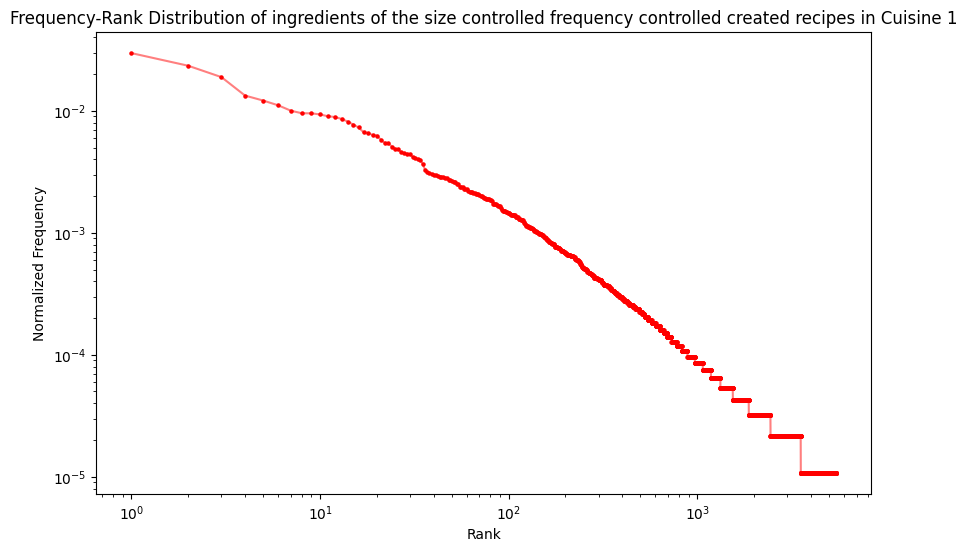

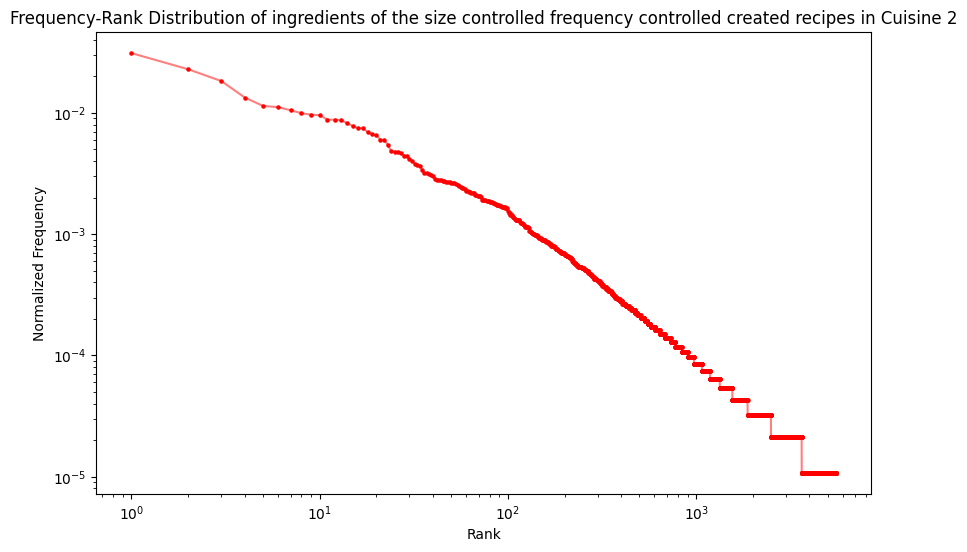

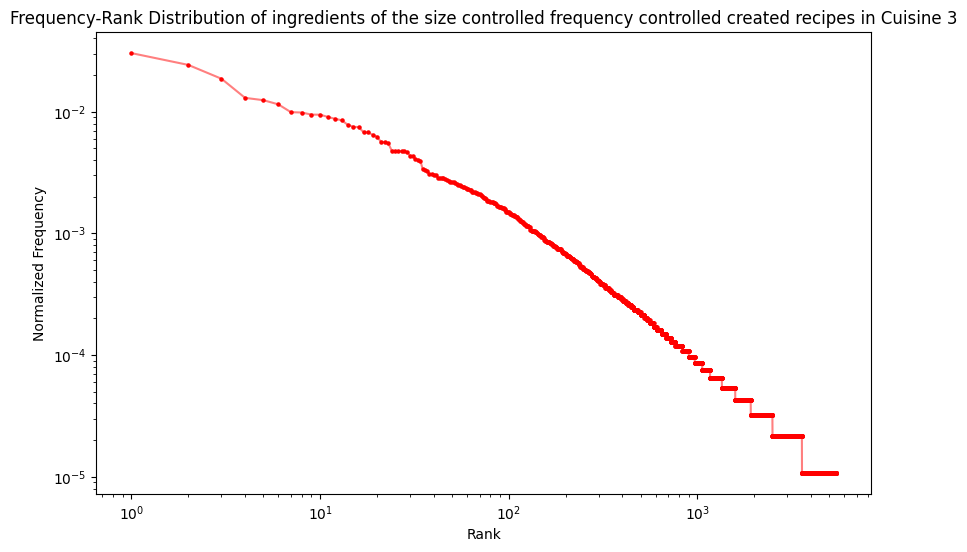

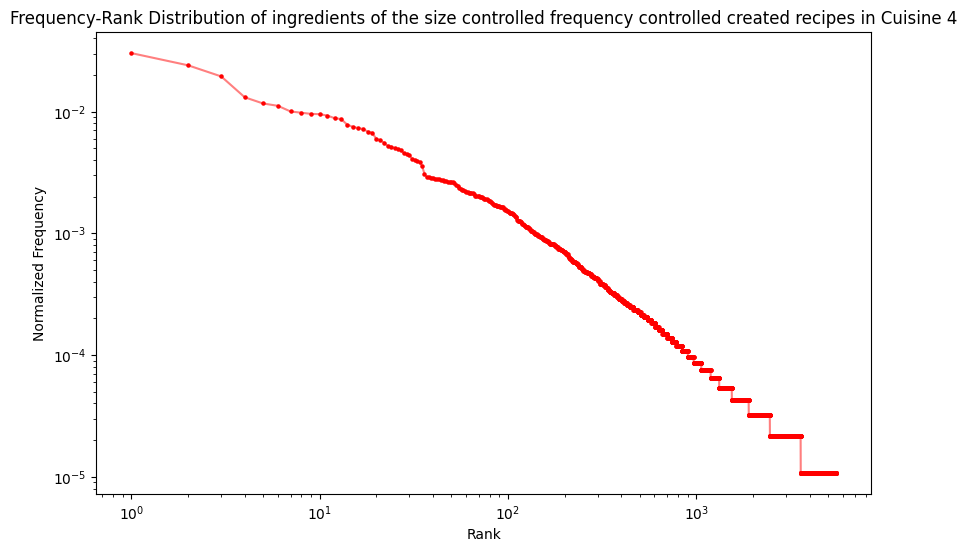

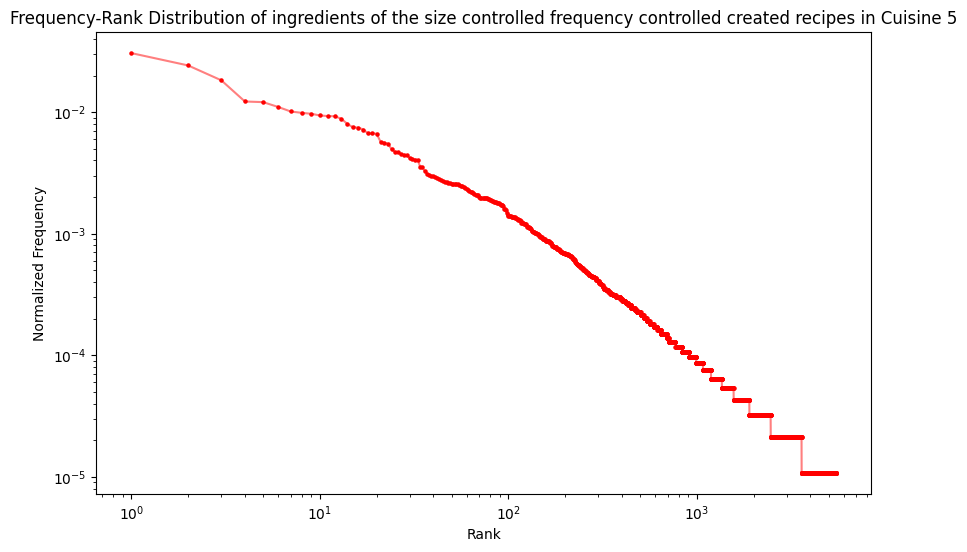

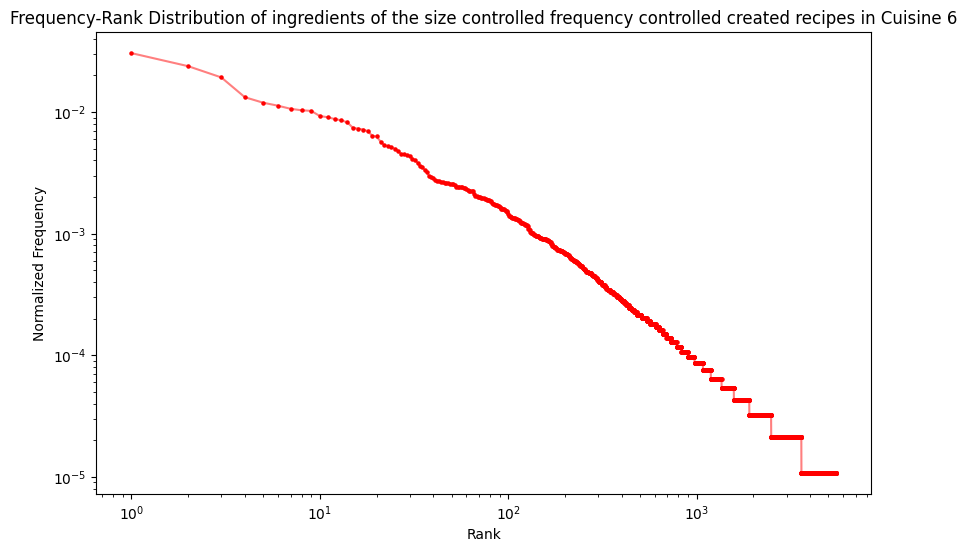

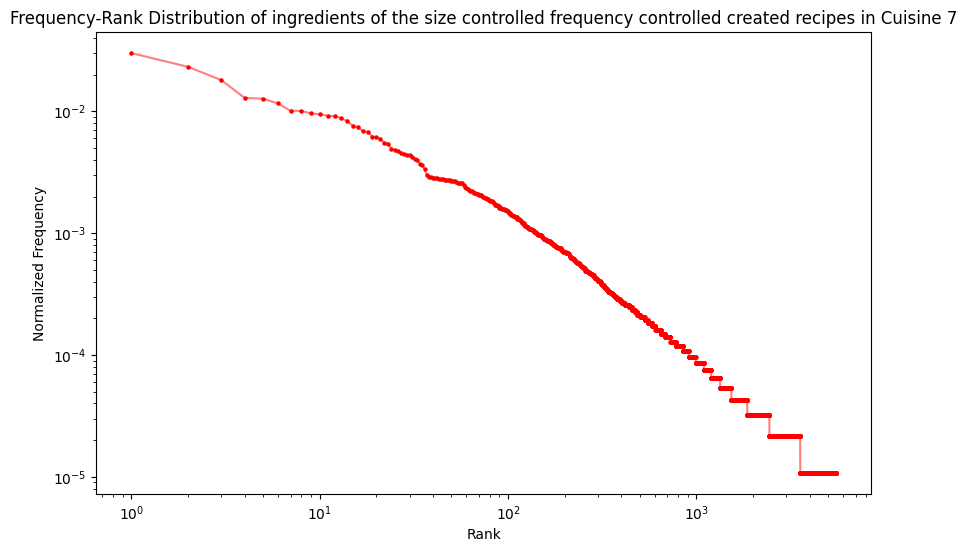

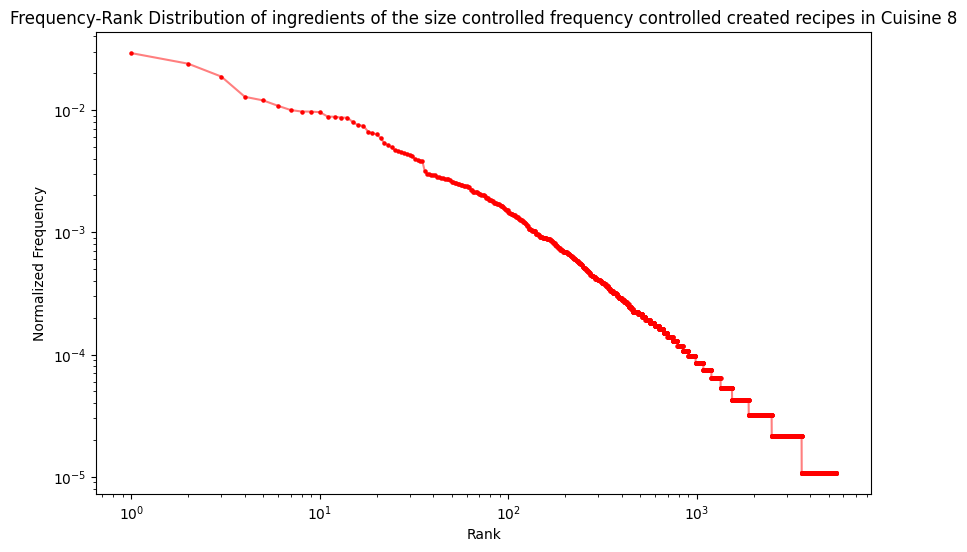

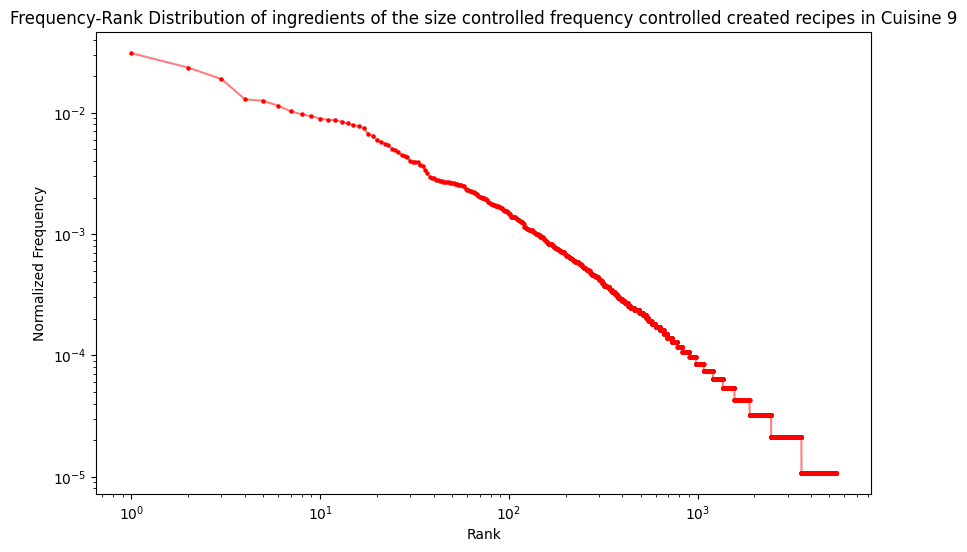

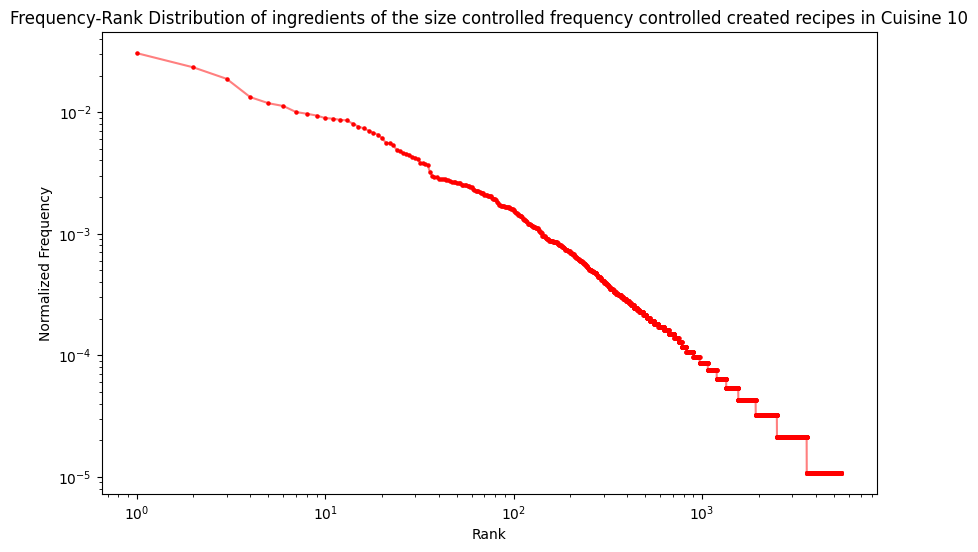

In [14]:
for i in range(10):
    df = get_count_df(size_ingre_freq_controlled_df[i])
    df = df.sort_values(by='Count', ascending=False)
    df['Rank'] = np.arange(1, len(df) + 1)
    df['Frequency'] = df['Count'] / total_count
    plt.figure(figsize=(10, 6))
    plt.title('Frequency-Rank Distribution of ingredients of the size controlled frequency controlled created recipes in Cuisine '+str(i+1))
    plt.scatter(df['Rank'], df['Frequency'], color='red', s=5,label = 'Normalised Frequency')
    plt.plot(df['Rank'], df['Frequency'], color='red', alpha=0.5)
    plt.xlabel('Rank')
    plt.ylabel('Normalized Frequency')
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig('Q3_plots/Q3b_size_controlled_frequency_controlled_created_recipes_cuisine_'+str(i+1)+'.png')
    plt.show()
    
